# Convolutional Neural Network

## Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.preprocessing import image

# Tensorflow version
print(tf.__version__)


2.13.0


# Part 1 - Data Preprocessing


## Training Data Set

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
    "./flower_photos/train",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

Found 3540 images belonging to 5 classes.


## Validation Data Set

In [5]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_set = valid_datagen.flow_from_directory('./flower_photos/validation',
                                                target_size=(128, 128),
                                                batch_size=32,
                                                class_mode='categorical')


Found 80 images belonging to 5 classes.


# Part 2 - Building the CNN

### Initializing the model

In [7]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution Layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, 
                                kernel_size=3, 
                                activation='relu', 
                                input_shape=[128, 128, 3]))

### Step 2 - Pooling Layer

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding 2nd Convolution Layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding 3rd Convolutional Layer

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding 4th Convolution Layer

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding 5th Convolution Layer

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Flattening


In [14]:
cnn.add(tf.keras.layers.Flatten())

In [15]:
# Full connected layer
cnn.add(tf.keras.layers.Dense(units=200, activation='relu'))

# 2nd Full connected layer
cnn.add(tf.keras.layers.Dense(units=150, activation='relu'))

# Output layer
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

### Compiling the CNN

In [16]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Plotting accuracy and loss graphs

In [17]:
# Custom callback to record accuracy and loss values after each epoch
class LossAccHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.losses = []
        self.accuracy = []
        self.val_losses = []
        self.val_accuracy = []

    def on_epoch_end(self, epoch, logs=None):
        self.losses.append(logs.get('loss'))
        self.accuracy.append(logs.get('accuracy'))
        self.val_losses.append(logs.get('val_loss'))
        self.val_accuracy.append(logs.get('val_accuracy'))

In [18]:
# Training the CNN with custom callback
history = LossAccHistory()
cnn.fit(x=training_set,validation_data=valid_set,epochs=40,callbacks=[history])

Epoch 1/40
111/111 [==============================] - 65s 562ms/step - loss: 1.3733 - accuracy: 0.3836 - val_loss: 1.1119 - val_accuracy: 0.5500
Epoch 2/40
111/111 [==============================] - 41s 366ms/step - loss: 1.0588 - accuracy: 0.5630 - val_loss: 1.0090 - val_accuracy: 0.5750
Epoch 3/40
111/111 [==============================] - 40s 361ms/step - loss: 0.9749 - accuracy: 0.6037 - val_loss: 1.0017 - val_accuracy: 0.6500
Epoch 4/40
111/111 [==============================] - 42s 378ms/step - loss: 0.8988 - accuracy: 0.6480 - val_loss: 0.8257 - val_accuracy: 0.7000
Epoch 5/40
111/111 [==============================] - 42s 379ms/step - loss: 0.8514 - accuracy: 0.6667 - val_loss: 0.7365 - val_accuracy: 0.6750
Epoch 6/40
111/111 [==============================] - 42s 379ms/step - loss: 0.8185 - accuracy: 0.6726 - val_loss: 0.6686 - val_accuracy: 0.7250
Epoch 7/40
111/111 [==============================] - 43s 382ms/step - loss: 0.7572 - accuracy: 0.6994 - val_loss: 0.6793 - val_ac

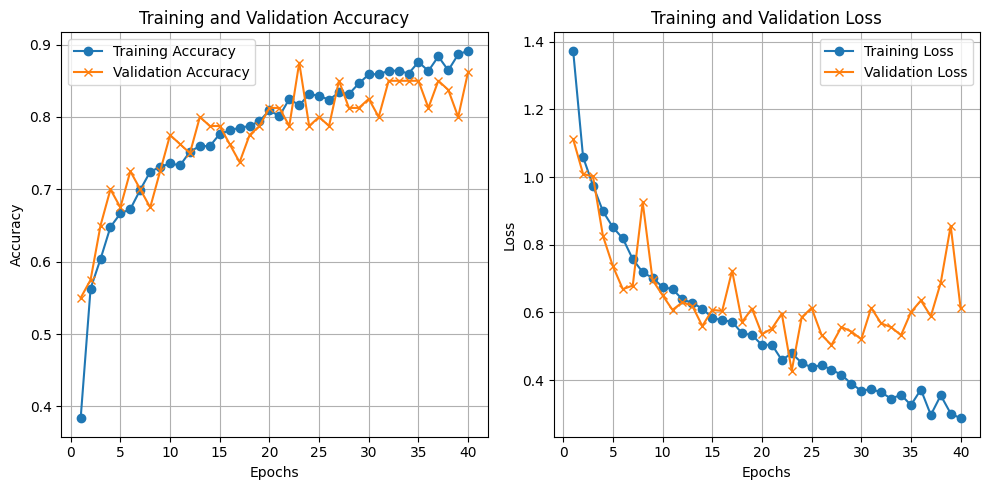

In [19]:
epochs = range(1, len(history.accuracy) + 1)

plt.figure(figsize=(10, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, history.accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, history.val_accuracy, label='Validation Accuracy', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history.losses, label='Training Loss', marker='o')
plt.plot(epochs, history.val_losses, label='Validation Loss', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Saving the model


In [20]:
cnn.save('Flowers_final.h5')

C:\Users\GK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing

### Loading the model

In [44]:
model = tf.keras.models.load_model('Flowers_final.h5')

## Printing images and labels

1/1 [==============================] - 0s 40ms/step
The image flower (1).jpg is classified as daisy


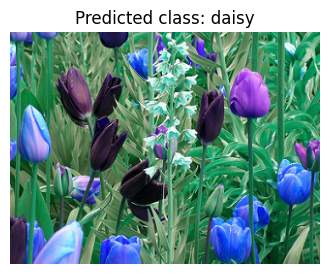

1/1 [==============================] - 0s 33ms/step
The image flower (2).jpg is classified as tulip


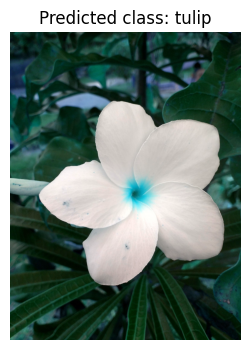

1/1 [==============================] - 0s 42ms/step
The image flower (3).jpg is classified as sunflower


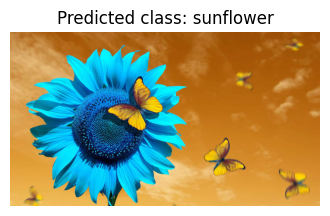

1/1 [==============================] - 0s 29ms/step
The image flower (4).jpg is classified as tulip


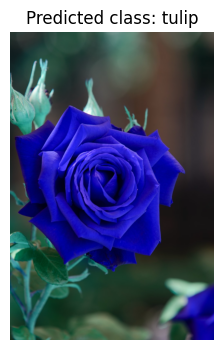

1/1 [==============================] - 0s 42ms/step
The image flower (5).jpg is classified as dandelion


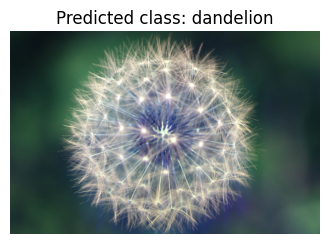

In [48]:
from PIL import Image
import cv2
# from Keras import keras
def predict_image(model, image_path):
    
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))
    img = np.array(img).reshape(1, 128, 128, 3)
    prediction = model.predict(img)
    class_names = ["daisy", "dandelion", "rose", "sunflower", "tulip"]
    return np.argmax(prediction), class_names[np.argmax(prediction)]

def main():

    folder_path = "./flower_photos/single_prediction/"
    for file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file)
        predicted_class, class_name = predict_image(model, image_path)
        print(f"The image {file} is classified as {class_name}")
        
        # Display the image with the prediction
        img = cv2.imread(image_path)
        cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(4, 4))
        plt.axis('off')
        plt.title(f"Predicted class: {class_name}")
        plt.imshow(img)
        plt.show()

if __name__ == "__main__":
    main()
